# Statistically Relevant Marketing Decisions

We are working for an e-learning company in this (pretend) exercise and would like to find the two best markets to advertise our product, which focuses upon web and mobile development. This will be a significant investment so we would like to have some confidence gained from statistical analysis.

We will analyze a New Coders survey from freeCodeCamp, which may be found [here](https://github.com/freeCodeCamp/2018-new-coder-survey). freeCodeCamp offers free training for prospective coders who are interested in web development and other topics. 31,000 respondees, who have had 5 or less years of experience in programming, noted whether or not they are employed in the industry, why they wanted to learn to code, and coding habits, and other items that disclose the mindset of a newbie coder. This will help inform our marketing campaign so that we know who to target and why.

In [48]:
## import libraries and read csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

pd.options.display.max_columns = None

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [49]:
survey.shape

(18175, 136)

In [50]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Relevant Columns

* Age
* AttendedBootcamp
* BootcampRecommend
* CityPopulation
* CountryCitizen
* CountryLive
* EmploymentField
* EmploymentStatus
* JobRoleInterest
* Gender
* HoursLearning
* Income
* MoneyForLearning
* SchoolDegree
* SchoolMajor

To gain a better understanding of our population of, apparently, 18k respondees, we should know where they are located, how much they're willing to spend, and other details.

## Coveted Roles

We do want to understand what roles are of interest to these fledgling programmers, so we will review a frequency table for the column `JobRoleInterest`.


In [51]:
role_interest = survey['JobRoleInterest'].value_counts(normalize=True).sort_values(ascending=False)*100

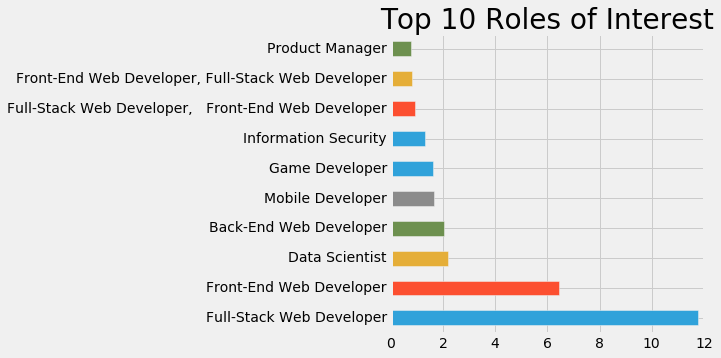

In [52]:
## graph most popular coveted roles

style.use('fivethirtyeight')

role_interest.head(10).plot.barh(figsize=(5,5))
plt.title('Top 10 Roles of Interest',fontsize=28)
plt.show()

### How does the population "stack" up?

Luckily for our research and marketing purposes, the most popular title is full-stack web developer at 11.8%, followed by front-end web developer at 6.4%. Mobile developer is fifth on the list at 1.7%. It appears that the population of this survey aligns with our wants and needs since we are hocking web and mobile development e-learning courses.

We should recognize that while it's possible to select more than one role, the top five responses are singular roles. 

In [53]:
## make sure all respondents entered a job role interest
survey = survey[survey['JobRoleInterest'].notnull()]

In [54]:
## get top 10 countries that people live in

## get absolute frequency first
country_live_abs = survey['CountryLive'].value_counts().sort_values(ascending=False).head(10)

## create dataframe
country_live = pd.DataFrame(country_live_abs)
country_live = country_live.rename(columns = {'CountryLive':'abs freq'})

## add relative frequency
country_live_rel = survey['CountryLive'].value_counts(normalize=True).sort_values(ascending=False).head(10)
country_live['rel freq'] = round(country_live_rel*100,2)
country_live

,abs freq,rel freq
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


### Which two countries make the best markets?

It appears that the heft of learners are in the US at 37.8% and 9.1% are in India. Next we have the UK at 4.9% and Canada at 4%. The US and India would be our top picks since they are head and shoulders above the other countries in terms of participating learners on freeCodeAcademy.

In [55]:
## restrict dataset to top 4 countries only

target_countries = 'United States of America', 'India', 'United Kingdom', 'Canada'

survey_ltd = survey[survey['CountryLive'].isin(target_countries)].copy()
survey_ltd

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,

In [56]:
survey_ltd.shape

(4228, 136)

## Educational Spend per Month

Finding the educational spend per month will help inform our campaign strategy, so it's very important. Now that we are focusing on just four countries, will can identify this spend per pupil and calculate the averages per country.

In [57]:
## get each pupil's edu spend per month


## replace 0 month vals with 1

survey['MonthsProgramming'] = survey['MonthsProgramming'].replace(0,1)

## create new column for monthly spend

survey_ltd['spend_per_month'] = survey['MoneyForLearning']/survey['MonthsProgramming']

We're not interested in 0 spend so we will remove those pupils from the dataset.

In [58]:
## identify whether or not there are null vals in new column

survey_ltd['spend_per_month'].isna().sum()

313

In [59]:
## restrict dataset to non-null vals for that column

survey_ltd = survey_ltd[survey_ltd['spend_per_month'].notnull()].copy()

In [60]:
survey_ltd.shape

(3915, 137)

In [61]:
## see what the avg monthly spend is per country

survey_ltd[['CountryLive','spend_per_month']].groupby(by='CountryLive').mean()

,spend_per_month
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


The US spends the most per month, by and large. However this mean could be skewed due to outliers, so we will create a boxplot to check.

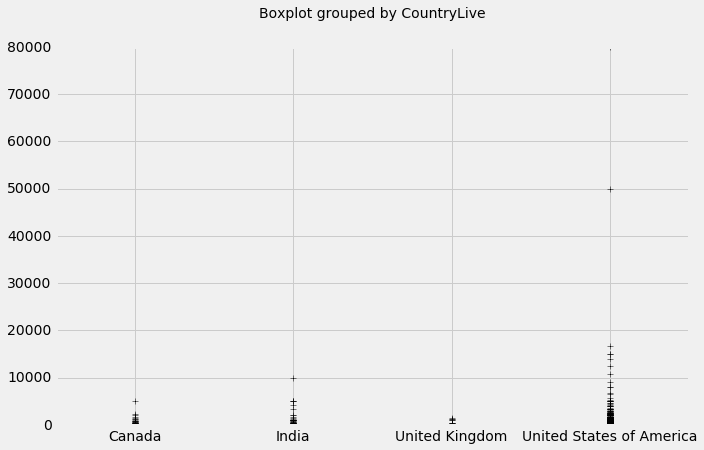

In [62]:
survey_ltd[['CountryLive','spend_per_month']].boxplot(column='spend_per_month',by='CountryLive',figsize=(11,7))
plt.xlabel('')
plt.ylabel('')
plt.title('')


There are indeed multiple outliers, particularly in the US. The simplest move is to remove those who spend more than 10000 per month and move on from there.

### Working with Outliers

Our first step is to remove those pupils who spend more than 10000 per month and then work our dataset from there.

In [63]:
## cut respondees who spend more than 10000 per month

survey_ltd = survey_ltd[survey_ltd['spend_per_month']<10000]

In [64]:
## revisit average amounts of spend by country

survey_ltd[['CountryLive','spend_per_month']].groupby(by='CountryLive').mean()

,spend_per_month
CountryLive,
Canada,113.510961
India,113.748387
United Kingdom,45.534443
United States of America,155.459187


This reduced the US average spend by about 100! Let's check a boxplot to identify further outliers.

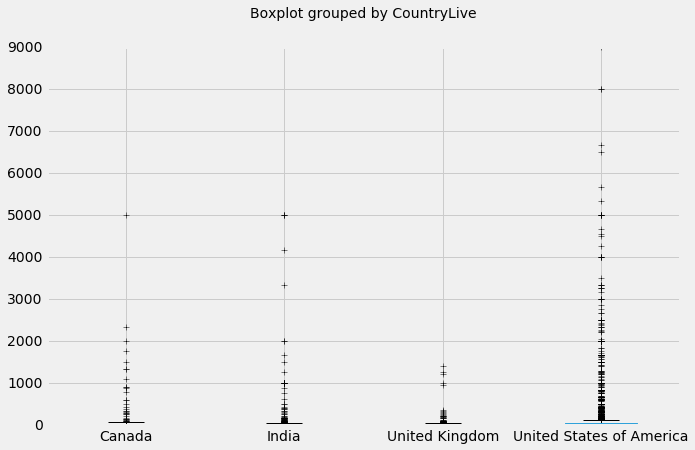

In [65]:
survey_ltd[['CountryLive','spend_per_month']].boxplot(column='spend_per_month',by='CountryLive',figsize=(11,7))
plt.xlabel('')
plt.ylabel('')
plt.title('')

### Using Z-Scores

There are yet some outliers. Rather than play a guessing game, we will determine the mean and standard deviation and consider refining our population by zscore.

In [66]:
overall_mean = survey_ltd['spend_per_month'].mean()
overall_std = survey_ltd['spend_per_month'].std()
print('overall mean:',overall_mean)
print('overall standard deviation:',overall_std)

overall mean: 140.09642005489903
overall standard deviation: 555.2365333843042


While the overall mean is dragged up by the US dominating the number of pupils, the overall standard deviation would be inclusive of our other countries. So we will go ahead and calculate the z-score for each pupil.

In [67]:
## calculate z-score

survey_ltd['z_score'] = (survey_ltd['spend_per_month']-overall_mean)/overall_std

## look at z-scores

survey_ltd['z_score'].value_counts(bins=15).sort_index()

(-0.27, 0.828]      3682
(0.828, 1.909]       103
(1.909, 2.99]         46
(2.99, 4.07]          26
(4.07, 5.151]         15
(5.151, 6.231]         9
(6.231, 7.312]         5
(7.312, 8.393]         4
(8.393, 9.473]        10
(9.473, 10.554]        1
(10.554, 11.635]       1
(11.635, 12.715]       1
(12.715, 13.796]       0
(13.796, 14.876]       2
(14.876, 15.957]       1
Name: z_score, dtype: int64

In [68]:
## bool mask to remove z-score outliers

bool = (survey_ltd['z_score']<3) & (survey_ltd['z_score']>-3)

# now we create a dataset without outliers

survey_clean = survey_ltd[bool].copy()

## check z-scores

survey_clean['z_score'].value_counts(bins=5).sort_index()

(-0.256, 0.378]    3596
(0.378, 1.008]      119
(1.008, 1.639]       59
(1.639, 2.269]       26
(2.269, 2.899]       31
Name: z_score, dtype: int64

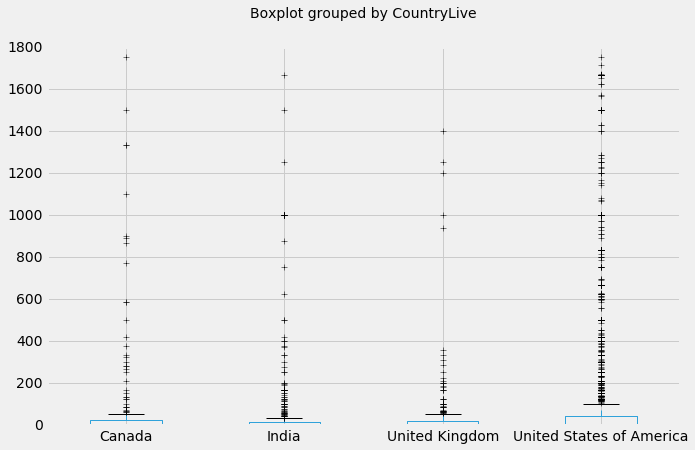

In [69]:
survey_clean[['CountryLive','spend_per_month']].boxplot(column='spend_per_month',by='CountryLive',figsize=(11,7))
plt.xlabel('')
plt.ylabel('')
plt.title('')

In [70]:
survey_clean[['CountryLive','spend_per_month']].groupby(by='CountryLive').mean()

,spend_per_month
CountryLive,
Canada,75.550481
India,57.256604
United Kingdom,45.534443
United States of America,81.623608


We are left with more reasonable means per country, particularly the US, although we can see from the boxplot that we still have some big spenders in all countries. It is possible that they spent their money on bootcamps, which come with a hefty price tag.

Removing extreme outliers (z-score > 3 and z-score < -3) did bring down India's average spend to sub 59, which is important because our e-learning subscription is $59.

## Selecting Marketing Territory

Since Canada only accounted for 3% of students in the survey, we should consider marketing in the US only. After studying z-scores and recalculating the mean spend by country we learned that only students in the US and Canada spend $59 or more per  month on programming education, so that disqualifies both India and the UK.

It is possible however to expand the Canadian market. Perhaps freeCodeAcademy has not done this work. It may be worthwhile for the marketing team to consider Canada as a market.